In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [4]:
def cleaner(dataframe):
    for i in dataframe.columns: # ---------------------------------------------- Iterate through the columns of the data
        if ((dataframe[i].isnull().sum() / len(dataframe)) * 100) > 30: # ------ Check if the columns has above 30% of its data
            dataframe.drop(i, axis = 1, inplace = True)# ----------------------- Drop such columns
        elif dataframe[i].dtypes == 'O': # ------------------------------------- Select all categorical columns
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True) # ------ Replace the missing  with the mode
        else:
            dataframe[i].fillna(dataframe[i].median(), inplace = True) # ------- Select all numerical columns and clean missing with the median
    return dataframe

In [5]:
df = cleaner(df)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
gender_encode = LabelEncoder()
import pickle, joblib

gender_encode = LabelEncoder()
df['Gender'] = gender_encode.fit_transform(df[['Gender']])
joblib.dump(gender_encode, 'gender_encode.pkl')

education_level_encode = LabelEncoder()
df['Education Level'] = education_level_encode.fit_transform(df[['Education Level']])
joblib.dump(education_level_encode, 'education_level_encode.pkl')

job_title_encode = LabelEncoder()
df['Job Title'] = job_title_encode.fit_transform(df[['Job Title']])
joblib.dump(job_title_encode, 'job_title_encode.pkl')

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


<Axes: >

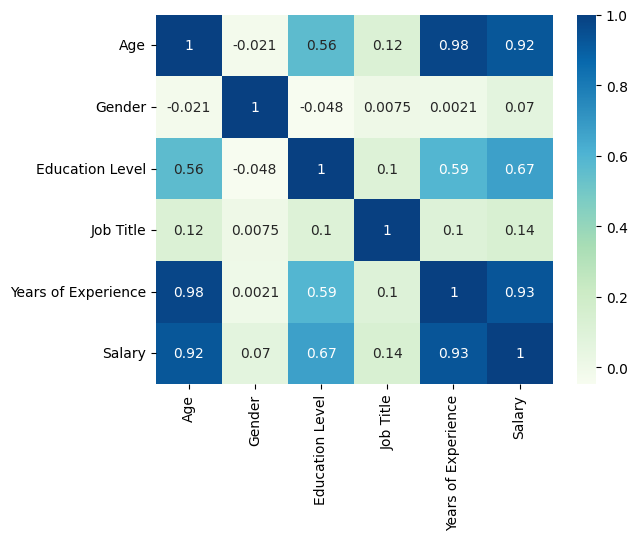

In [7]:
# ASCERTAINING MULTI-COLINEARITY
sns.heatmap(df.corr(), annot = True, cmap = 'GnBu')

In [8]:
from sklearn.linear_model import ElasticNet, RANSACRegressor, HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [9]:
# Split Into Train and Test
x = df.drop(['Salary'], axis = 1)
y = df['Salary']
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.90)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print('ytrain: {}'.format(ytrain.shape))
print('ytest: {}'.format(ytest.shape))


xtrain: (337, 5)
xtest: (38, 5)
ytrain: (337,)
ytest: (38,)


In [10]:
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)

# cross-validate the model
cross_val = rf_model.predict(xtrain)

print(f'Random Forest Model Performance: {r2_score(cross_val, ytrain).round(2)}')

Random Forest Model Performance: 0.99


In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(xtrain, ytrain)
rf_model

RandomForestRegressor()

In [12]:
joblib.dump(rf_model, 'salary_model.pkl')